- In this case study, I have been provided with images of traffic signs and the goal is to train a Deep Network to classify them
- The dataset contains 43 different classes of images. 
- Classes are as listed below: 

    - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
    - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
    - ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
    - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
    - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
    - (10, b'No passing for vehicles over 3.5 metric tons')
    - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
    - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
    - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
    - (18, b'General caution') (19, b'Dangerous curve to the left')
    - (20, b'Dangerous curve to the right') (21, b'Double curve')
    - (22, b'Bumpy road') (23, b'Slippery road')
    - (24, b'Road narrows on the right') (25, b'Road work')
    - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
    - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
    - (31, b'Wild animals crossing')
    - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
    - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
    - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
    - (40, b'Roundabout mandatory') (41, b'End of no passing')
    - (42, b'End of no passing by vehicles over 3.5 metric tons')

- The network used is called Le-Net that was presented by Yann LeCun
http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf


Citation

J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 

@inproceedings{Stallkamp-IJCNN-2011,
    author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel},
    booktitle = {IEEE International Joint Conference on Neural Networks},
    title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition},
    year = {2011},
    pages = {1453--1460}
}



-------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle # module that implement binary protocol 

In [2]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

validation data simply to avoid overfitting, expose the network w validation, 
making sure the network dont just focus on training data/

In [3]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_Test = test['features'], test['labels']

In [4]:
X_train.shape

#length, width, 3 channels represent color rgb

(34799, 32, 32, 3)

In [5]:
y_train.shape

(34799,)

----------------------------------
Data Exploration

1

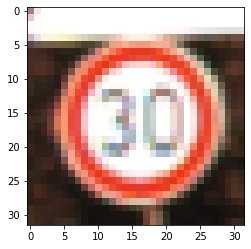

In [6]:
i = 3000

plt.imshow(X_train[i])
y_train[i]

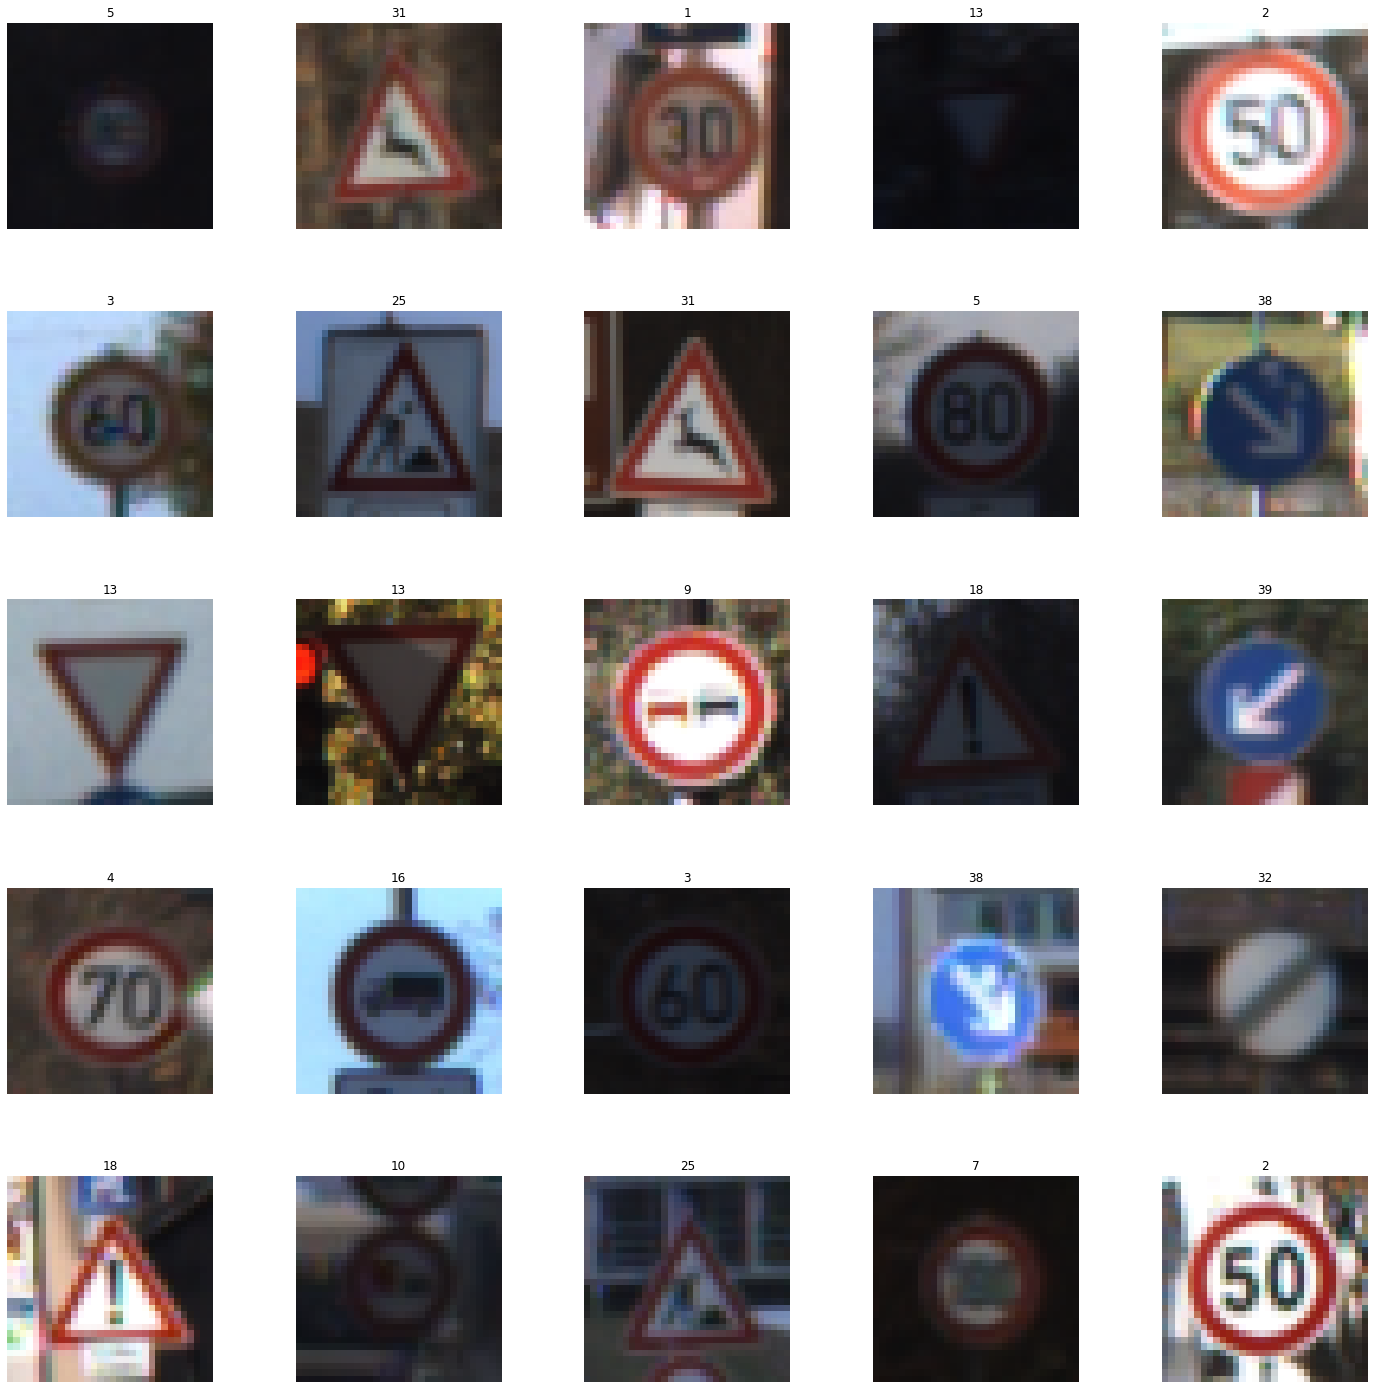

In [7]:
W_grid = 5
L_grid = 5

fig, axes = plt.subplots(L_grid, W_grid, figsize=(25,25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid*W_grid):
    index = np.random.randint(0, n_training) #random number index from X_train
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)

---------------------
Data Normalization


In [8]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [9]:
#grayscale
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)

In [10]:
X_train_gray.shape

X_train_gray.shape

(34799, 32, 32, 1)

In [11]:
X_test_gray.shape

(12630, 32, 32, 1)

In [12]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [13]:
#Normalization

X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_norm = (X_validation_gray - 128)/128

In [76]:
X_train_gray_norm

array([[[[ 0.09114583],
         [ 0.08333333],
         [ 0.078125  ],
         ...,
         [ 0.0390625 ],
         [ 0.04166667],
         [ 0.04166667]],

        [[ 0.0859375 ],
         [ 0.08072917],
         [ 0.0703125 ],
         ...,
         [ 0.05208333],
         [ 0.046875  ],
         [ 0.04166667]],

        [[ 0.07291667],
         [ 0.078125  ],
         [ 0.0703125 ],
         ...,
         [ 0.04166667],
         [ 0.04166667],
         [ 0.03645833]],

        ...,

        [[-0.3359375 ],
         [-0.31770833],
         [-0.32291667],
         ...,
         [ 0.4296875 ],
         [ 0.3828125 ],
         [ 0.35677083]],

        [[-0.42447917],
         [-0.40625   ],
         [-0.375     ],
         ...,
         [ 0.44791667],
         [ 0.42447917],
         [ 0.41666667]],

        [[-0.44270833],
         [-0.42447917],
         [-0.40885417],
         ...,
         [ 0.5234375 ],
         [ 0.48697917],
         [ 0.48697917]]],


       [[[-0.88020833],


<Figure size 432x288 with 0 Axes>

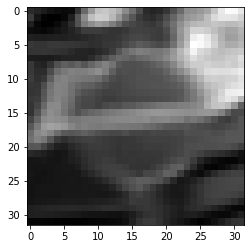

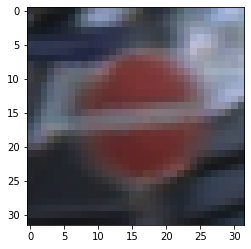

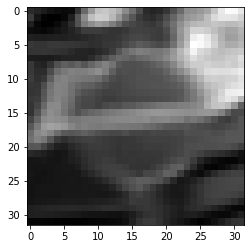

<Figure size 432x288 with 0 Axes>

In [15]:
i = 610

plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')
plt.figure()

-----------------------
Model Training

The model consists of the following layers: 

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6


    * Stride is the amount by which the kernel is shifted when the kernel is passed over the image.

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [17]:
Input_Shape = X_train.shape[1:]
Input_Shape

(32, 32, 3)

In [18]:
lenet_model = Sequential()

lenet_model.add(Conv2D(filters = 6, kernel_size= (5,5), activation = 'relu', input_shape = (32,32,1)))
lenet_model.add(AveragePooling2D()) #auto downsampling

lenet_model.add(Conv2D(filters = 16, kernel_size= (5,5), activation = 'relu'))
lenet_model.add(AveragePooling2D())

lenet_model.add(Flatten())

lenet_model.add(Dense(units=120, activation='relu'))
lenet_model.add(Dense(units=84, activation='relu'))

lenet_model.add(Dense(units=43, activation='softmax'))

In [19]:
lenet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [20]:
lenet_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy'])

#class 0,1 -> binary_crossentropy

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


batch is how many images gonna be fed on network at once

verbose is how much information to display as actual network is trained

In [21]:
hist = lenet_model.fit(X_train_gray_norm,
               y_train,
               batch_size = 500,
               epochs = 10,
               verbose = 1,
               validation_data = (X_validation_norm, y_validation))

Epoch 1/10
70/70 [==============================] - 4s 47ms/step - loss: 3.0541 - accuracy: 0.2114 - val_loss: 2.3266 - val_accuracy: 0.3873
Epoch 2/10
70/70 [==============================] - 3s 46ms/step - loss: 1.4097 - accuracy: 0.5990 - val_loss: 1.2374 - val_accuracy: 0.6340
Epoch 3/10
70/70 [==============================] - 3s 46ms/step - loss: 0.8403 - accuracy: 0.7560 - val_loss: 0.9360 - val_accuracy: 0.7200
Epoch 4/10
70/70 [==============================] - 3s 46ms/step - loss: 0.6171 - accuracy: 0.8251 - val_loss: 0.8065 - val_accuracy: 0.7578
Epoch 5/10
70/70 [==============================] - 3s 47ms/step - loss: 0.4950 - accuracy: 0.8629 - val_loss: 0.7240 - val_accuracy: 0.7782
Epoch 6/10
70/70 [==============================] - 3s 48ms/step - loss: 0.4206 - accuracy: 0.8834 - val_loss: 0.7291 - val_accuracy: 0.7821
Epoch 7/10
70/70 [==============================] - 3s 45ms/step - loss: 0.3577 - accuracy: 0.9032 - val_loss: 0.6269 - val_accuracy: 0.8249
Epoch 8/10
70

--------------
Model Evaluation 

In [23]:
#hist.history.keys()

In [31]:
score = lenet_model.evaluate(X_test_gray_norm, y_Test)


395/395 [==============================] - 1s 2ms/step - loss: 0.9475 - accuracy: 0.8148


In [33]:
print('Test Accuracy : {}'.format(score[1]))

Test Accuracy : 0.8148060441017151


In [34]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [35]:
loss = hist.history['loss']
accuracy = hist.history['accuracy']
val_loss = hist.history['val_loss']
val_accuracy = hist.history['val_accuracy']


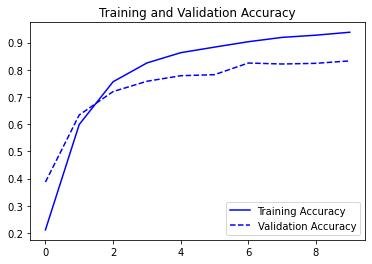

In [46]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b--', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

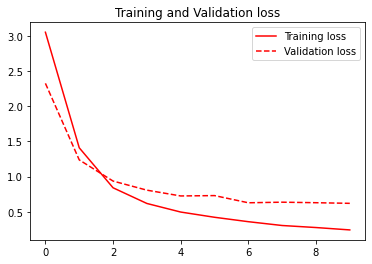

In [47]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'r--', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [67]:
predicted_classes = lenet_model.predict(X_test_gray_norm)

y_true = y_Test

In [69]:
from sklearn.metrics import confusion_matrix

predicted_class = np.argmax(predicted_classes, axis=1)
cm = confusion_matrix(y_true, predicted_class)
cm

array([[ 24,  28,   0, ...,   0,   0,   0],
       [  6, 648,  28, ...,   0,   0,   0],
       [  1, 107, 502, ...,   0,   0,   0],
       ...,
       [  0,   1,   0, ...,  39,   0,   0],
       [  0,   0,   0, ...,   0,  38,   1],
       [  0,   0,   0, ...,   0,  21,  63]], dtype=int64)

<AxesSubplot:>

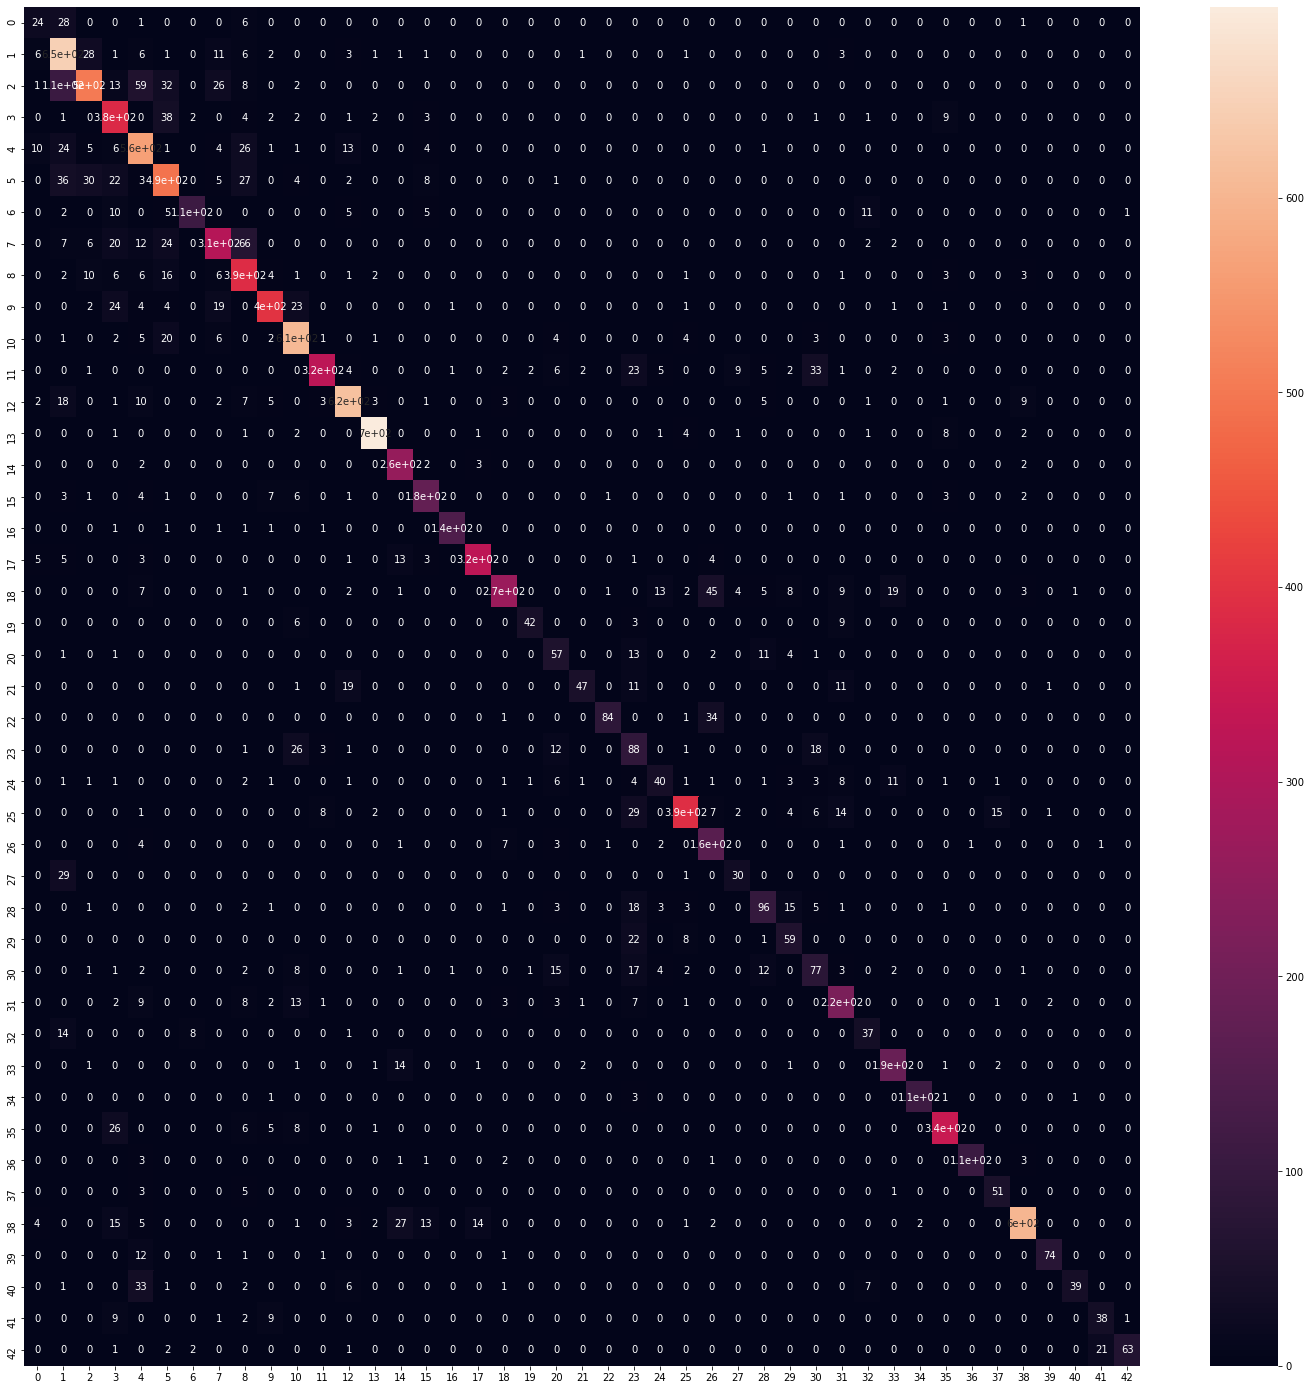

In [71]:
plt.figure(figsize=(25,25))
sns.heatmap(cm, annot=True)

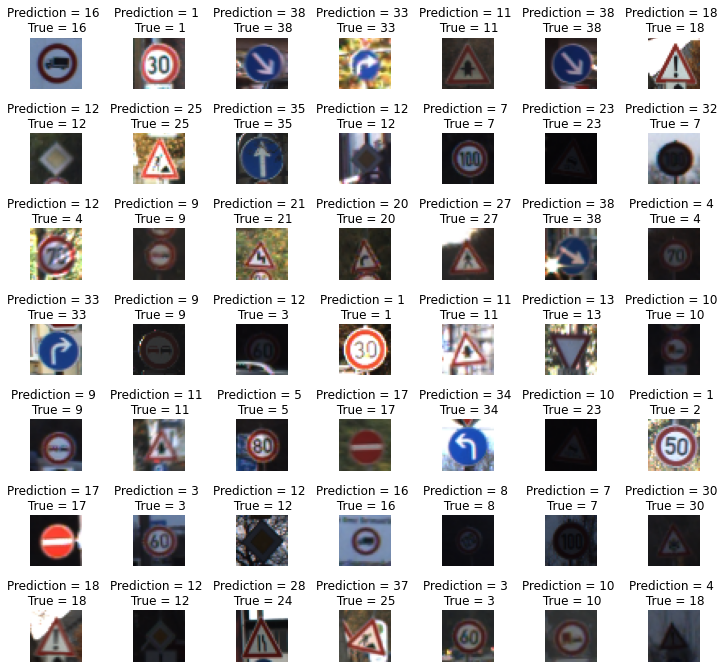

In [72]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {} \n True = {}'.format(predicted_class[i],y_true[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 1)

-----------------
save the model 

In [78]:
import os
directory = os.path.join(os.getcwd(), 'saved_models') #get current working directory

if not os.path.isdir(directory):
    os.makedirs(directory)

model_path = os.path.join(directory, 'LeNet_trained_model.h5')
lenet_model.save(model_path)